<a href="https://colab.research.google.com/github/KIRAN3031/Data-Analysis/blob/main/Features_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working On Different Datasets


In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
os.listdir('drive/MyDrive')

['Colab Notebooks',
 'IMG-20240804-WA0000.jpg',
 'S50242200390405.pdf',
 'CSE BTech 3rd &4th years R22 CS and SYLLABUS 2024-25  (6-02-2025).pdf.gdrive',
 'Apriori_2.py',
 'Copy of CSE BTech 3rd &4th years R22 CS and SYLLABUS 2024-25  (6-02-2025).pdf.gdrive',
 '23B81A0523_DS 1.pdf',
 'report_1758117564972.pdf',
 'Screenshot_20250917-194243 (2).png',
 'Screenshot_20250917-194243 (1).png',
 'Screenshot_20250917-194243.png',
 'IMG-20250919-WA0014.jpg',
 'Screenshot_20250919-202335 (2).png',
 'Screenshot_20250919-202335 (1).png',
 'Screenshot_20250919-202335.png',
 'report_1758295583089.pdf',
 'Screenshot_20250920-204323 (2).png',
 'Screenshot_20250920-204323 (1).png',
 'Screenshot_20250920-204323.png',
 'report_1758381299832.pdf',
 'Screenshot_20250922-202350 (2).png',
 'Screenshot_20250922-202350 (1).png',
 'Screenshot_20250922-202350.png',
 'report_1758552862123.pdf',
 'Audio from Kiran',
 'Abstract552[1].pdf',
 'Abstract552[1] (2).gdoc',
 'Abstract552[1] (1).gdoc',
 'Abstract552[1].gdoc

## Task 1 — Data Loading, Merging & Initial Inspection
    1. Load all required CSV files into your notebook.
    2. Merge them into one dataset using Store, Dept, and Date.
    3. Display the first and last 10 rows.
    4. Print:
      .shape
      .info()
      .describe()
    5. Identify:
      Numerical columns
      Categorical columns
      Date columns
    6. List all unique store types and departments.
    7. Identify which columns may require cleaning or type conversion



In [ ]:
df_features = pd.read_csv('drive/MyDrive/features.csv')
df_stores = pd.read_csv('drive/MyDrive/stores.csv')
df_train = pd.read_csv('drive/MyDrive/train.csv')

In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# Merge them into one dataset using Store, Dept, and Date.
df_merged = pd.merge(df_train, df_features, on=['Store', 'Date'], how='left')
df_merged = pd.merge(df_merged, df_stores, on=['Store'], how='left')
df_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


In [ ]:
# Display the first 10 rows.
df_merged.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [ ]:
# Display last 10 rows
df_merged.tail(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
421560,45,98,2012-08-24,415.40,False,72.62,3.834,7936.20,58.38,22.00,5518.07,2291.97,191.344887,8.684,False,B,118221
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221
421562,45,98,2012-09-07,352.44,True,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True,B,118221
421563,45,98,2012-09-14,605.96,False,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,191.699850,8.684,False,B,118221
421564,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,False,B,118221
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221


In [ ]:
df_merged.shape

(421570, 17)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
 15  Type          421570 non-null  object 
 16  Size          421570 non-null  int64  
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [ ]:
df_merged.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
# Identification of Categorical, Numerical and Date columns
df_merged.info()
df_merged['Date']=pd.to_datetime(df_merged['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
print("Categorical Columns:")
print(df_merged.select_dtypes(include=['object']).columns)

print("\nNumerical Columns:")
print(df_merged.select_dtypes(include=['int64', 'float64']).columns)

print("\nDate Columns:")
print(df_merged.select_dtypes(include=['datetime64']).columns)

Categorical Columns:
Index(['Type'], dtype='object')

Numerical Columns:
Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

Date Columns:
Index(['Date'], dtype='object')


In [ ]:
# List all unique store types and departments.
unique_store_types = df_merged['Type'].unique()
unique_departments = df_merged['Dept'].unique()

print("Unique Store Types:")
print(unique_store_types)

print("\nUnique Departments:")
print(unique_departments)

Unique Store Types:
['A' 'B' 'C']

Unique Departments:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 39 50 43 65]


In [ ]:
# Identifying which columns may require cleaning or type conversion
df_merged.info() # for type conversions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

In [ ]:
df_merged.isnull().sum() # for cleaning

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


## Task 2 — Data Cleaning
    1. Identify missing values using .isnull().sum().
    2. Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
    3. Fill missing markdown-related fields with mean values.
    4. Convert Date column to datetime format.
    5. Remove duplicate rows.
    6. Reset the index after cleaning.

In [ ]:
# Identify missing values using .isnull().sum().
df_merged.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday_x,0
Temperature,0
Fuel_Price,0
MarkDown1,270889
MarkDown2,310322
MarkDown3,284479


In [ ]:
# Fill missing numeric values (Temperature, Fuel_Price, CPI, Unemployment) using median.
print('There are no numeric missing values (Temperature, Fuel_Price, CPI, Unemployment)')

There are no numeric missing values (Temperature, Fuel_Price, CPI, Unemployment)


In [ ]:
# filling missing markdown-related fields with mean values.
df_merged['MarkDown1'].fillna(df_merged['MarkDown1'].mean(), inplace=True)
df_merged['MarkDown2'].fillna(df_merged['MarkDown2'].mean(), inplace=True)
df_merged['MarkDown3'].fillna(df_merged['MarkDown3'].mean(), inplace=True)
df_merged['MarkDown4'].fillna(df_merged['MarkDown4'].mean(), inplace=True)

/tmp/ipython-input-1500786268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['MarkDown1'].fillna(df_merged['MarkDown1'].mean(), inplace=True)
/tmp/ipython-input-1500786268.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
# Convert Date column to datetime format.
print('Already Converted')

Already Converted


In [ ]:
# Remove duplicate rows.
df_merged.drop_duplicates(inplace=True)

In [ ]:
# Reset the index after cleaning.
df_merged.reset_index(drop=True, inplace=True)

## Task 3 — Outlier Detection & Treatment
    1. Detect outliers in:
        Weekly_Sales
        Temperature
        Fuel_Price
        CPI
    2. Use:
        Boxplots
        IQR method
    3. Identify if extreme sales spikes occur during holiday weeks.
    4. Decide which outliers should be:
        Removed
        Capped
        Kept as business outliers

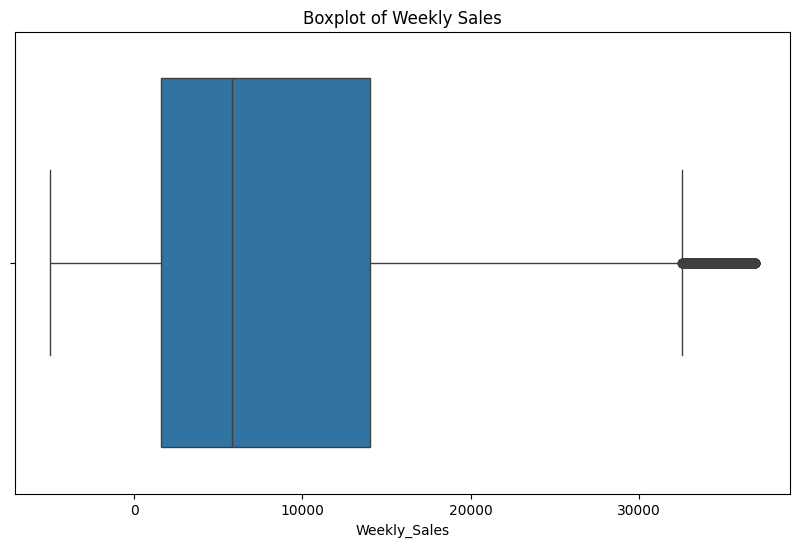

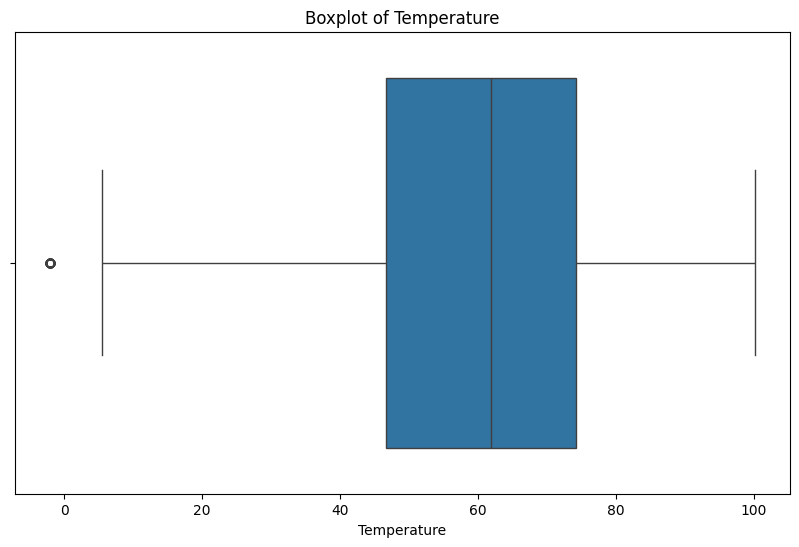

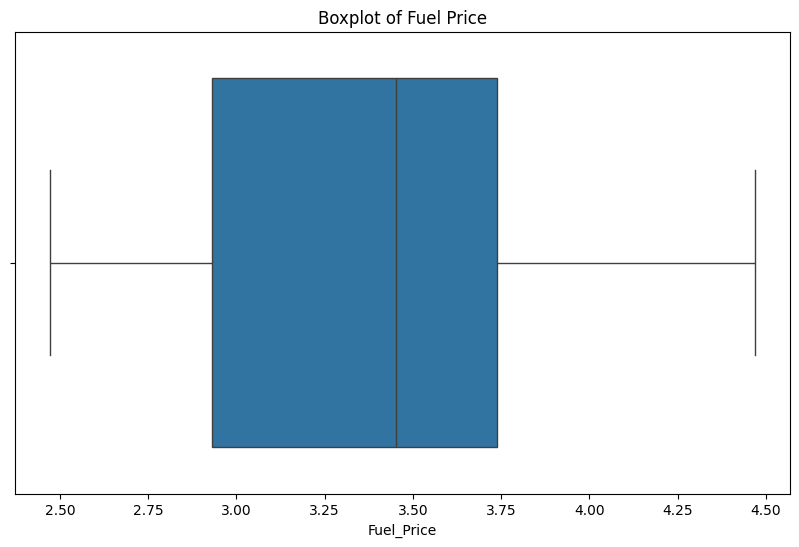

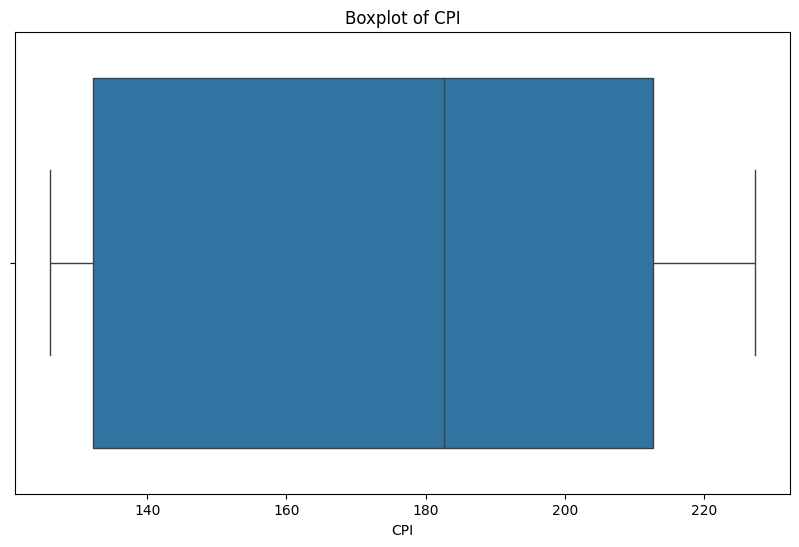

In [ ]:
'''Detect outliers in:
    Weekly_Sales
    Temperature
    Fuel_Price
    CPI'''
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Temperature'])
plt.title('Boxplot of Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Fuel_Price'])
plt.title('Boxplot of Fuel Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['CPI'])
plt.title("Boxplot of CPI")
plt.show()

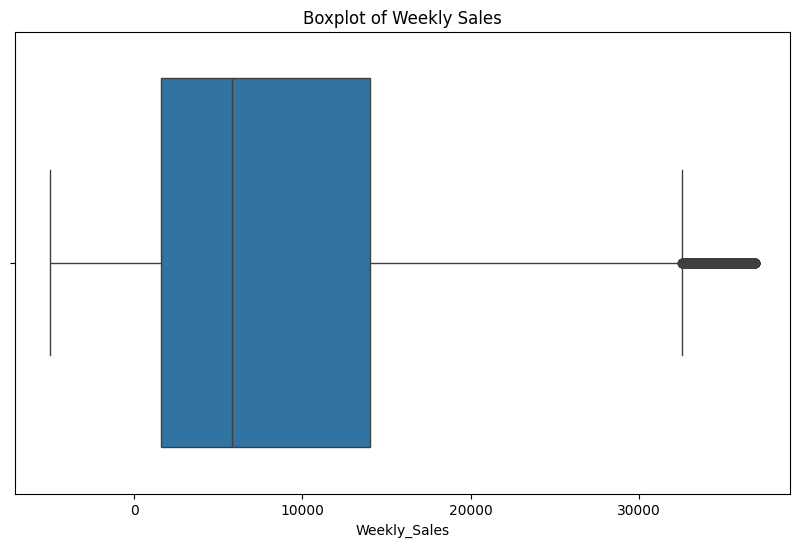

In [ ]:
# Using the IQR values
Q1 = df_merged['Weekly_Sales'].quantile(0.25)
Q3 = df_merged['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged = df_merged[(df_merged['Weekly_Sales'] >= lower_bound) | (df_merged['Weekly_Sales'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.show()

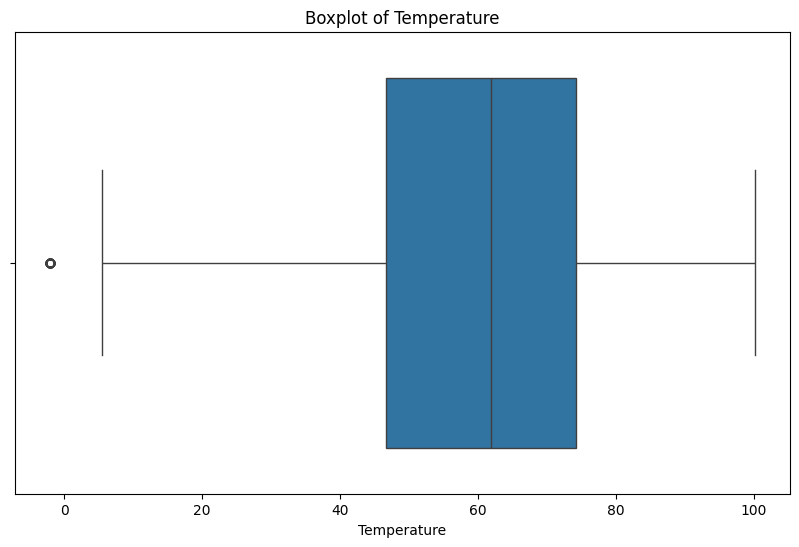

In [ ]:
Q1 = df_merged['Temperature'].quantile(0.25)
Q3 = df_merged['Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged = df_merged[(df_merged['Temperature'] >= lower_bound) | (df_merged['Temperature'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Temperature'])
plt.title('Boxplot of Temperature')
plt.show()

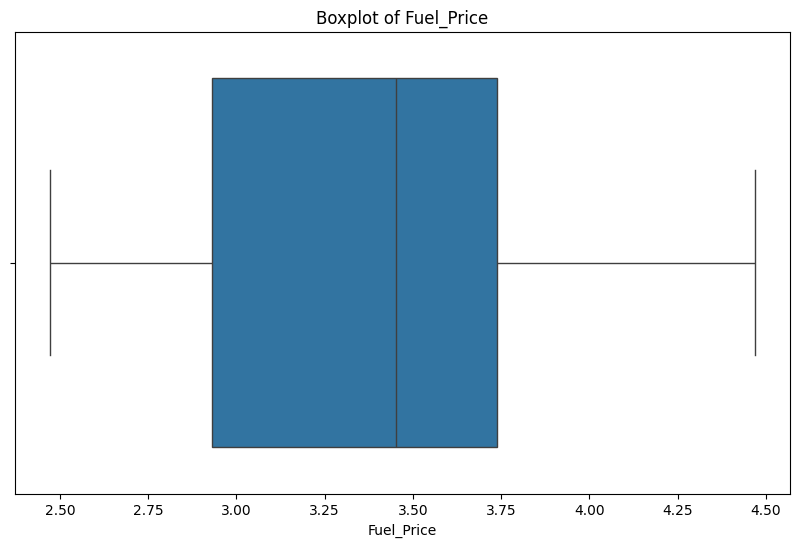

In [ ]:
Q1 = df_merged['Fuel_Price'].quantile(0.25)
Q3 = df_merged['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged = df_merged[(df_merged['Fuel_Price'] >= lower_bound) & (df_merged['Fuel_Price'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Fuel_Price'])
plt.title('Boxplot of Fuel_Price')
plt.show()

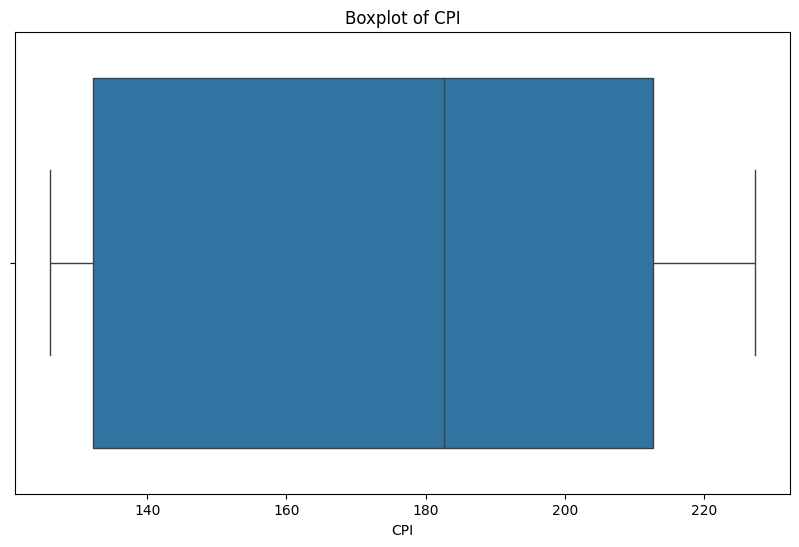

In [ ]:
Q1 = df_merged['CPI'].quantile(0.25)
Q3 = df_merged['CPI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged = df_merged[(df_merged['CPI'] >= lower_bound) & (df_merged['CPI'] <= upper_bound)]
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['CPI'])
plt.title('Boxplot of CPI')
plt.show()

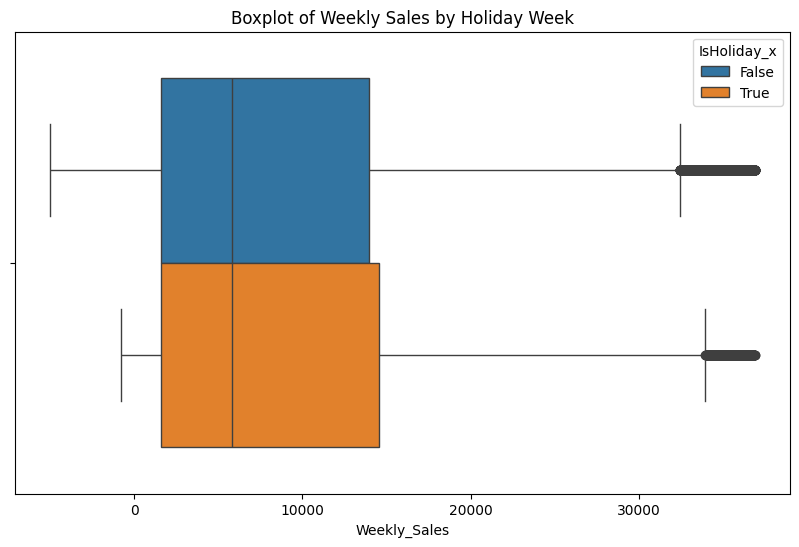

In [ ]:
# Identify if extreme sales spikes occur during holiday weeks.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merged['Weekly_Sales'], hue=df_merged['IsHoliday_x'])
plt.title('Boxplot of Weekly Sales by Holiday Week')
plt.show()

In [ ]:
''' Decide which outliers should be:
    Removed
    Capped
    Kept as business outliers '''



## Task 4 — Univariate Analysis
    1. Perform univariate analysis (one variable at a time):
        Weekly sales distribution (Histogram + KDE).
    2. Store type distribution (Count plot).
    3. Distribution of Temperature, Fuel Price, CPI, Unemployment.
    4. Distribution of sales during:
        Holiday weeks
        Non-holiday weeks
    5. Identify top 10 departments by average weekly sales.

## Task 5 — Bivariate Analysis
    1. Study the relationship between two variables:
        Relationship between Temperature & Weekly Sales (scatter plot).
    2. Relationship between Fuel Price & Weekly Sales.
    3. Weekly Sales vs. Store Type.
    4. Weekly Sales vs. Holiday_Flag.
    5. Compare sales between:
        Top-performing store
        Lowest-performing store

## Task 6 — Multivariate Analysis
    Analyze more than two variables together:
    1. Create a correlation heatmap for all numeric features.
    2. Analyze store-level sales using:
        Store Type
        Store Size
        Weekly Sales
    3. Multivariate relationship:
        Weekly Sales vs Temperature vs Holiday_Flag (3-variable plot or grouped summary)
    4. Analyze whether discount markdowns influence sales when considering:
        Date
        Holiday weeks
        Markdown values

## Task 7 — Time Series Analysis
    1. Convert Date to:
        Year
        Month
        Week
    2. Plot total weekly sales over time.
    3. Plot monthly sales trends for:
        Store with highest sales
        Store with lowest sales
    4. Identify seasonal patterns:
        Which months show peak sales?
        Which departments show seasonal demand?

## Task 8 — Feature Engineering

### Task 8A — Create New Columns
    1. year, month, week → from date.
    2. discount_effect = MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4 + MarkDown5
    3. is_peak_season → True if month in {11, 12}.
    4. normalized_sales = Weekly_Sales / Size

### Task 8B — Filter Using Created Columns
    1. Show all peak-season transactions where weekly_sales > 50,000.
    2. Show all stores whose normalized_sales is in the top 10% percentile.
    3. Show departments where discount_effect > median discount.
    4. Filter rows where:
        Temperature < 40
        Fuel price > 3.5
        Weekly sales between 20,000 and 60,000
        is_peak_season = True

### Task 8C — Grouping & Business Insights
    1. Monthly average sales per store.
    2. Total discount_effect per department.
    3. Department with highest normalized_sales.
    4. Compute store-wise revenue potential:
        revenue_potential = Weekly_Sales * 52
    5. Identify top 10 stores based on revenue potential.